In [ ]:
from scipy.stats import poisson,binom,norm,expon,geom,kruskal,stats, f_oneway,ttest_1samp, ttest_ind,chi2_contingency,levene,chi2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Problem statement:

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [ ]:
df.describe(include= 'all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,...,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,...,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


In [ ]:
df.isna().sum()/df.shape[0] * 100 # There is no null values present.

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [ ]:
df.nunique()

data                                   2
trip_creation_time                 14787
route_schedule_uuid                 1497
route_type                             2
trip_uuid                          14787
source_center                       1496
source_name                         1496
destination_center                  1466
destination_name                    1466
od_start_time                      26223
od_end_time                        26223
start_scan_to_end_scan              1914
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   92894
actual_distance_to_destination    143965
actual_time                         3182
osrm_time                           1531
osrm_distance                     137544
factor                             45588
segment_actual_time                  746
segment_osrm_time                    214
segment_osrm_distance             113497
segment_factor                      5663
dtype: int64

In [ ]:
datetime_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in datetime_columns:
    df[i] = pd.to_datetime(df[i])

In [ ]:
df.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                          object
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

In [ ]:
df.columns



Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [ ]:
dic = {'data' : 'first',
      'route_type' : 'first',
      'trip_creation_time' : 'first',
      'source_name' : 'first',
      'destination_name' : 'last',
      'od_start_time' : 'first',
      'od_end_time' : 'first',
      'start_scan_to_end_scan' : 'first',
      'actual_distance_to_destination' : 'last',
      'actual_time' : 'last',
      'osrm_time' : 'last',
      'osrm_distance' : 'last',
      'segment_actual_time' : 'sum',
      'segment_osrm_time' : 'sum',
      'segment_osrm_distance' : 'sum'}

g_1 = ['trip_uuid', 'source_center', 'destination_center']
dfa = df.groupby(by = g_1, as_index = False).agg(dic)

dfa

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [ ]:
df['trip_creation_time'].min(), df['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

In [ ]:
# 3. In-depth analysis and feature engineering:

 # Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required.

dfa['od_total_time'] = dfa['od_end_time'] - dfa['od_start_time']
dfa.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
dfa['od_total_time'] = dfa['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
dfa['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [ ]:
dic1 = {'source_center' : 'first',
      'destination_center' : 'last',
      'trip_creation_time' : 'first',
      'source_name' : 'first',
      'destination_name' : 'last',
      'od_total_time' : 'sum',
      'start_scan_to_end_scan' : 'first',
      'actual_distance_to_destination' : 'last',
      'actual_time' : 'last',
      'osrm_time' : 'last',
      'osrm_distance' : 'last',
      'segment_actual_time' : 'sum',
      'segment_osrm_time' : 'sum',
      'segment_osrm_distance' : 'sum'}

dfb = dfa.groupby(by = 'trip_uuid', as_index = False).agg(dic1)

dfb

,trip_uuid,source_center,destination_center,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,1260.0,440.973689,830.0,388.0,544.8027,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,58.0,48.542890,96.0,42.0,56.9116,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,834.0,1689.964663,2736.0,1528.0,2072.8556,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,152.0,26.600536,63.0,27.0,29.5696,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,IND160002AAC,IND160002AAC,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.03,152.0,31.261599,49.0,34.0,44.5639,82.0,62.0,64.8551
14783,trip-153861104386292051,IND121004AAB,IND121004AAA,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.59,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14784,trip-153861106442901555,IND208006AAA,IND208006AAA,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,248.0,19.335831,92.0,24.0,28.8492,281.0,88.0,104.8866
14785,trip-153861115439069069,IND627005AAA,IND628204AAA,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,105.0,12.661945,30.0,14.0,16.0185,258.0,221.0,223.5324


In [ ]:
# Build some features to prepare the data for actual analysis. Extract features from the below fields:

In [ ]:
def loc_state(x):
    l = x.split('(')
    if len(l) == 1:
        return l[0]
    else:
        return l[1].replace(')', "")


In [ ]:
def loc_city(x):
    if 'location' in x:
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

In [ ]:
def loc_place(x):
    if 'location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

In [ ]:
dfb['source_state'] = dfb['source_name'].apply(loc_state)
dfb['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland'],
      dtype=object)

In [ ]:
dfb['source_city'] = dfb['source_name'].apply(loc_city)
print('No of source cities :', dfb['source_city'].nunique())
dfb['source_city'].unique()[:10]

No of source cities : 687


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune'], dtype=object)

In [ ]:
dfb['source_place'] = dfb['source_name'].apply(loc_place)
dfb['source_place'].unique()[:10]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP'], dtype=object)

In [ ]:
# Destination Name: Split and extract features out of destination. City-place-code (State)

dfb['destination_state'] = dfb['destination_name'].apply(loc_state)
dfb['destination_state'].head(10)

0    Uttar Pradesh
1        Karnataka
2          Haryana
3      Maharashtra
4        Karnataka
5       Tamil Nadu
6       Tamil Nadu
7        Karnataka
8          Gujarat
9            Delhi
Name: destination_state, dtype: object

In [ ]:
#  Destination Name: Split and extract features out of destination. City-place-code (City)

dfb['destination_city'] = dfb['destination_name'].apply(loc_city)
dfb['destination_city'].head(10)

0        Kanpur
1    Doddablpur
2       Gurgaon
3        Mumbai
4        Sandur
5       Chennai
6       Chennai
7     Bengaluru
8         Surat
9         Delhi
Name: destination_city, dtype: object

In [ ]:
dfb['destination_place'] = dfb['destination_name'].apply(loc_place)
dfb['destination_place'].head(10)

0      Central_H_6
1       ChikaDPP_D
2      Bilaspur_HB
3        MiraRd_IP
4       WrdN1DPP_D
5      Poonamallee
6      Vandalur_Dc
7    HBR Layout PC
8      Central_D_3
9           Bhogal
Name: destination_place, dtype: object

In [ ]:
# Trip_creation_time: Extract features like month, year and day etc

dfb['trip_creation_date'] = pd.to_datetime(dfb['trip_creation_time'].dt.date)
dfb['trip_creation_date'].head(10)

0   2018-09-12
1   2018-09-12
2   2018-09-12
3   2018-09-12
4   2018-09-12
5   2018-09-12
6   2018-09-12
7   2018-09-12
8   2018-09-12
9   2018-09-12
Name: trip_creation_date, dtype: datetime64[ns]

In [ ]:
dfb['trip_creation_day'] = dfb['trip_creation_time'].dt.day
dfb['trip_creation_day'] = dfb['trip_creation_day'].astype('int32')
dfb['trip_creation_day'].head(10)

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: trip_creation_day, dtype: int32

In [ ]:
dfb['trip_creation_month'] = dfb['trip_creation_time'].dt.month
dfb['trip_creation_month'] = dfb['trip_creation_month'].astype('int32')
dfb['trip_creation_month'].head(10)

0    9
1    9
2    9
3    9
4    9
5    9
6    9
7    9
8    9
9    9
Name: trip_creation_month, dtype: int32

In [ ]:
dfb['trip_creation_year'] = dfb['trip_creation_time'].dt.year
dfb['trip_creation_year'] = dfb['trip_creation_year'].astype('int32')
dfb['trip_creation_year'].head(10)

0    2018
1    2018
2    2018
3    2018
4    2018
5    2018
6    2018
7    2018
8    2018
9    2018
Name: trip_creation_year, dtype: int32

In [ ]:
dfb['trip_creation_week'] = dfb['trip_creation_time'].dt.isocalendar().week
dfb['trip_creation_week'] = dfb['trip_creation_week'].astype('int32')
dfb['trip_creation_week'].head(10)

0    37
1    37
2    37
3    37
4    37
5    37
6    37
7    37
8    37
9    37
Name: trip_creation_week, dtype: int32

In [ ]:
dfb['trip_creation_hour'] = dfb['trip_creation_time'].dt.hour
dfb['trip_creation_hour'] = dfb['trip_creation_hour'].astype('int32')
dfb['trip_creation_hour'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: trip_creation_hour, dtype: int32

In [ ]:
print("Rows :",dfb.shape[0], "Columns :",

dfb.shape[1])

Rows : 14787 Columns : 27


In [ ]:
dfb.describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14787.0,530.313468,658.415416,23.460000,149.695000,279.710000,633.535000,7898.550000
start_scan_to_end_scan,14787.0,339.769730,505.407155,22.000000,104.000000,174.000000,334.000000,7898.000000
actual_distance_to_destination,14787.0,104.005219,242.069053,9.002461,20.086307,32.852495,65.057323,1927.447705
actual_time,14787.0,227.443836,443.875166,9.000000,51.000000,86.000000,182.000000,4532.000000
osrm_time,14787.0,101.437817,213.971631,6.000000,23.000000,38.000000,73.000000,1686.000000
osrm_distance,14787.0,129.210983,293.953554,9.072900,26.018550,41.108100,86.025100,2326.199100
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400
trip_creation_day,14787.0,18.375127,7.882198,1.000000,14.000000,19.000000,25.000000,30.000000


In [ ]:
dfb.describe(include = 'object').T

,count,unique,top,freq
trip_uuid,14787,14787,trip-153671041653548748,1
source_center,14787,930,IND000000ACB,1052
destination_center,14787,1035,IND000000ACB,821
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
destination_name,14787,1035,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14787,29,Maharashtra,2714
source_city,14787,687,Mumbai,1442
source_place,14787,755,Bilaspur_HB,1052
destination_state,14787,31,Maharashtra,2561
destination_city,14787,805,Mumbai,1548


In [ ]:
# 3. In-depth analysis and feature engineering:

 # Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required.

dfa['od_total_time'] = dfa['od_end_time'] - dfa['od_start_time']
dfa.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
dfa['od_total_time'] = dfa['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
dfa['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [ ]:
# Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [ ]:
def count_unique_words(s):
    words = s.split()  # Split the string into words
    unique_words = set(words)  # Convert the list of words to a set to get unique words
    return len(unique_words)

In [ ]:
import scipy.stats as stats

# Given data
sample_mean = 155
hypothesized_mean = 150
sample_std = 8.5
sample_size = 10
significance_level = 0.05

# Calculate the t-test statistic
t = (sample_mean - hypothesized_mean) / (sample_std / (sample_size ** 0.5))

# Degrees of freedom
degrees_of_freedom = sample_size - 1

# Calculate the p-value
p_value = 1 - norm.cdf(t)
print(p_value)

if p_value < significance_level:
    print("bettr")
else:
    print("")

0.031431210741779014
bettr


In [ ]:
p_box1 = 1/2
p_apple_given_box1 = 6/11
p_apple_given_box2 = 5/11

# Calculate probability of picking apple overall
p_apple = (p_apple_given_box1 * p_box1) + (p_apple_given_box2 * p_box1)

# Calculate conditional probability using Bayes' theorem
p_box1_given_apple = (p_apple_given_box1 * p_box1) / p_apple

print("Probability of picking Box 1 given apple:", p_box1_given_apple)

Probability of picking Box 1 given apple: 0.5454545454545454


In [ ]:
array = np.random.randint(1,101,size=(5,5))
array[(array > 50) &(array < 80)] = 0
array[array !=0] = 1

array


array([[0, 0, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1]])

In [ ]:
a = 'the quick brown fox jumps over the lazy dog but the dog is lazy and the fox is quick'


Null Hypothesis ( Ho ) - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.

Alternate Hypothesis ( Ha ) - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.


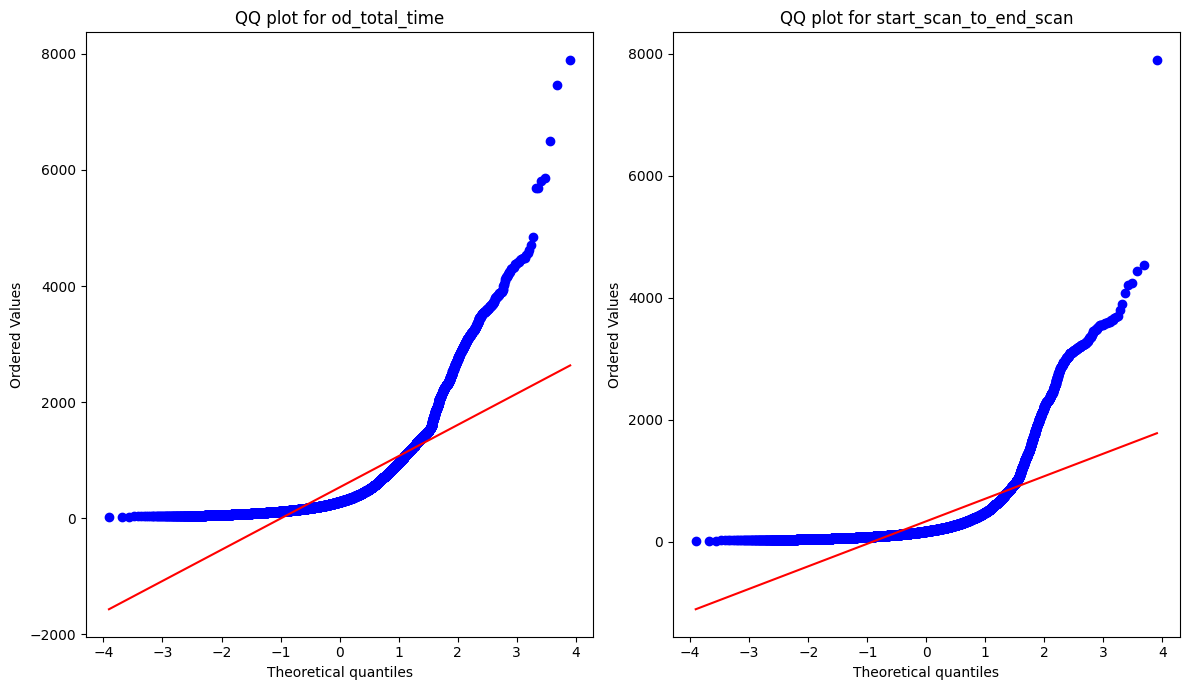

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats


plt.figure(figsize=(12, 7))

# Plot the QQ plot for 'od_total_time' in the first subplot
plt.subplot(1, 2, 1)
stats.probplot(dfb['od_total_time'], plot=plt)
plt.title('QQ plot for od_total_time')

plt.subplot(1, 2, 2)
stats.probplot(dfb['start_scan_to_end_scan'], plot=plt)
plt.title('QQ plot for start_scan_to_end_scan')


plt.tight_layout()
plt.show()


In [ ]:
 # It can be seen from the above plots that the samples do not come from normal distribution.

In [ ]:
test_stat, p_value = levene(dfb['osrm_distance'], dfb['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance / Normal distribution')
else:
    print('The samples have Homogenous Variance / Normal distribution')

p-value 2.6727169494145576e-95
The samples do not have Homogenous Variance / Normal distribution


Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid).

In [ ]:
dfb[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14787.000000,14787.000000
mean,101.437817,180.511598
std,213.971631,314.679279
min,6.000000,6.000000
25%,23.000000,30.000000
50%,38.000000,65.000000
75%,73.000000,184.000000
max,1686.000000,2564.000000


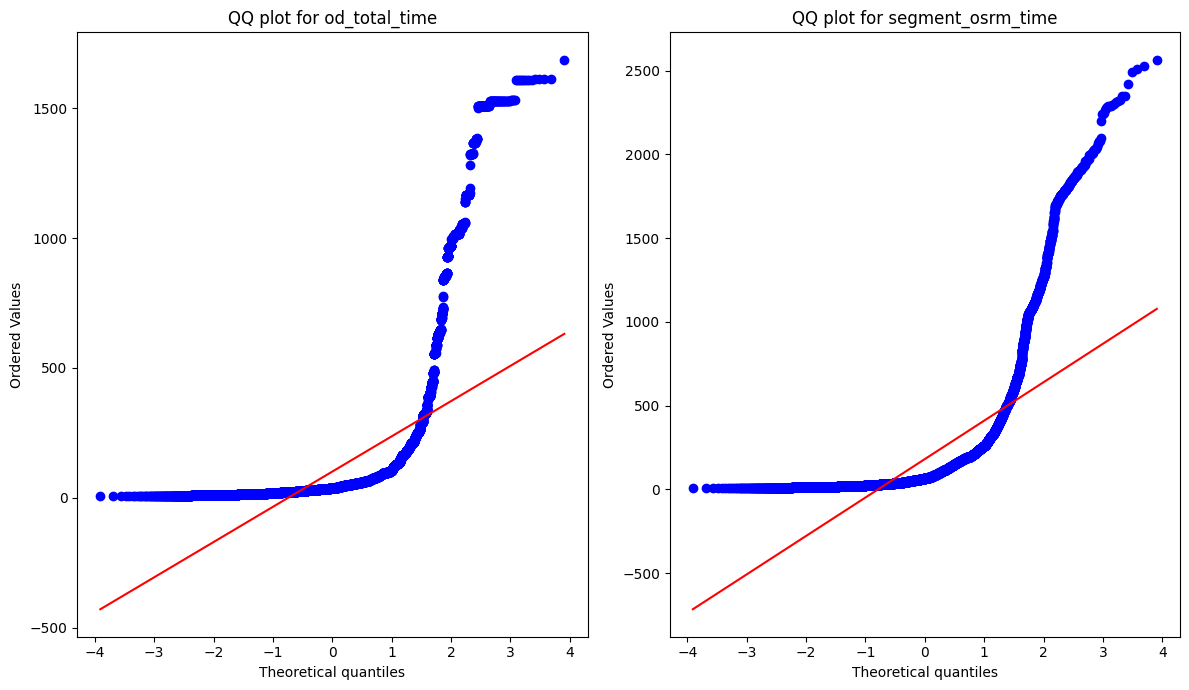

In [ ]:
plt.figure(figsize=(12, 7))

# Plot the QQ plot for 'od_total_time' in the first subplot
plt.subplot(1, 2, 1)
stats.probplot(dfb['osrm_time'], plot=plt)
plt.title('QQ plot for od_total_time')

plt.subplot(1, 2, 2)
stats.probplot(dfb['segment_osrm_time'], plot=plt)
plt.title('QQ plot for segment_osrm_time')


plt.tight_layout()
plt.show()

This does not follow normal distribution.

In [ ]:
test_stat, p_value = levene(dfb['actual_time'], dfb['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance/ Normal distribution')
else:
    print('The samples have Homogenous Variance/ Normal distribution')

p-value 1.3394273360061925e-10
The samples do not have Homogenous Variance/ Normal distribution


Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
dfb[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14787.000000,14787.000000
mean,227.443836,353.059174
std,443.875166,556.365911
min,9.000000,9.000000
25%,51.000000,66.000000
50%,86.000000,147.000000
75%,182.000000,364.000000
max,4532.000000,6230.000000


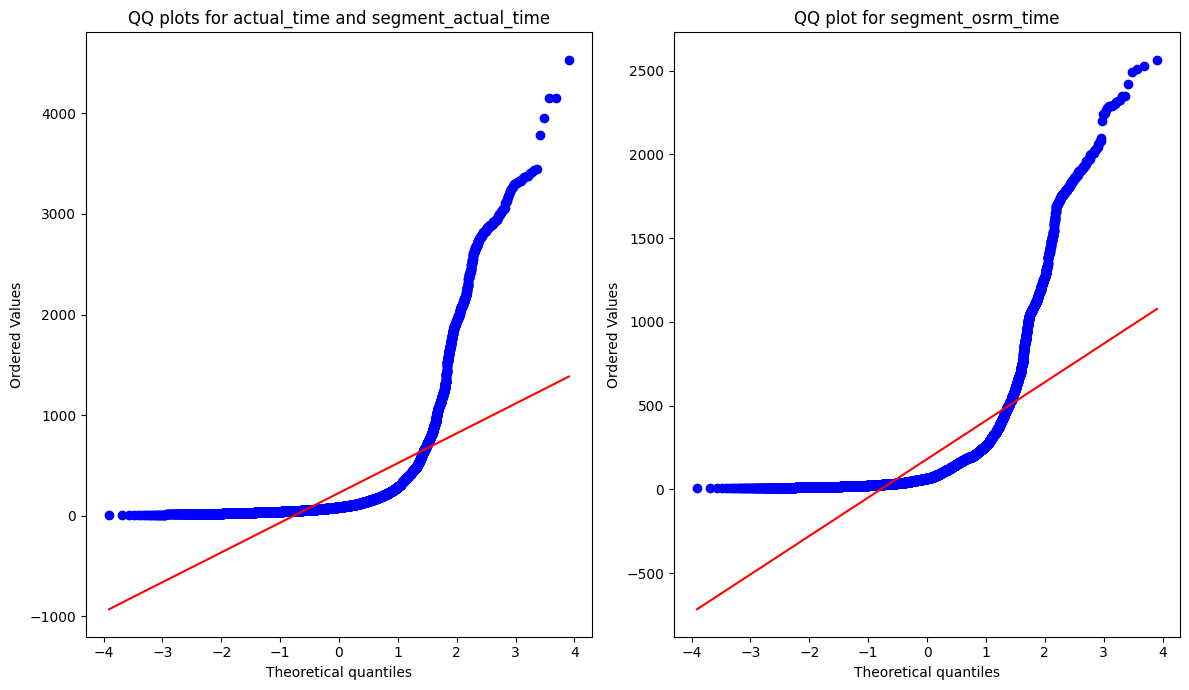

In [ ]:
plt.figure(figsize=(12, 7))

# Plot the QQ plot for 'od_total_time' in the first subplot
plt.subplot(1, 2, 1)
stats.probplot(dfb['actual_time'], plot=plt)
plt.title('QQ plots for actual_time and segment_actual_time')

plt.subplot(1, 2, 2)
stats.probplot(dfb['segment_osrm_time'], plot=plt)
plt.title('QQ plot for segment_osrm_time')


plt.tight_layout()
plt.show()


This does not follow normal distribution.

In [ ]:
test_stat, p_value = levene(dfb['actual_time'], dfb['segment_actual_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance / Normal distribution')
else:
    print('The samples have Homogenous Variance / Normal distribution')

p-value 1.7012850612953372e-80
The samples do not have Homogenous Variance / Normal distribution



Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
dfb[['osrm_distance', 'segment_osrm_distance']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_distance,14787.0,129.210983,293.953554,9.0729,26.01855,41.1081,86.0251,2326.1991
segment_osrm_distance,14787.0,222.705466,416.846279,9.0729,32.57885,69.7842,216.5606,3523.6324


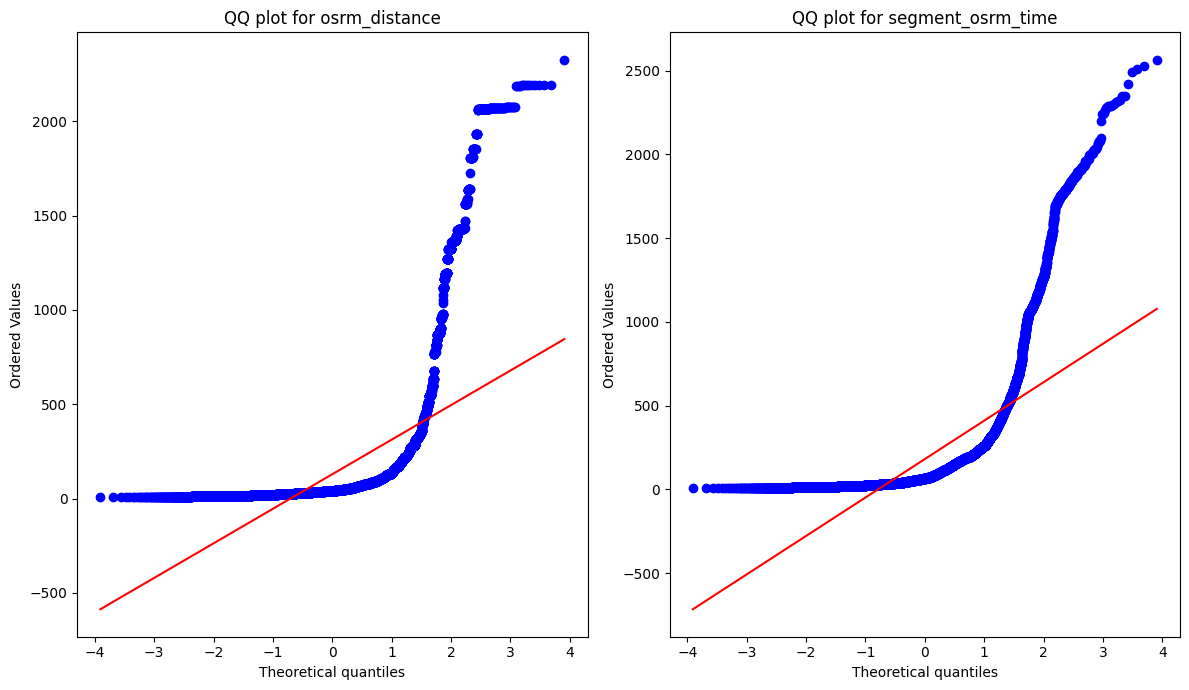

In [ ]:
plt.figure(figsize=(12, 7))

# Plot the QQ plot for 'od_total_time' in the first subplot
plt.subplot(1, 2, 1)
stats.probplot(dfb['osrm_distance'], plot=plt)
plt.title('QQ plot for osrm_distance')

plt.subplot(1, 2, 2)
stats.probplot(dfb['segment_osrm_time'], plot=plt)
plt.title('QQ plot for segment_osrm_time')


plt.tight_layout()
plt.show()





This does not follow normal distribution.

In [ ]:
test_stat, p_value = levene(dfb['osrm_distance'], dfb['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance / normal distribution')
else:
    print('The samples have Homogenous Variance / normal distribution')

p-value 2.6727169494145576e-95
The samples do not have Homogenous Variance / normal distribution


Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

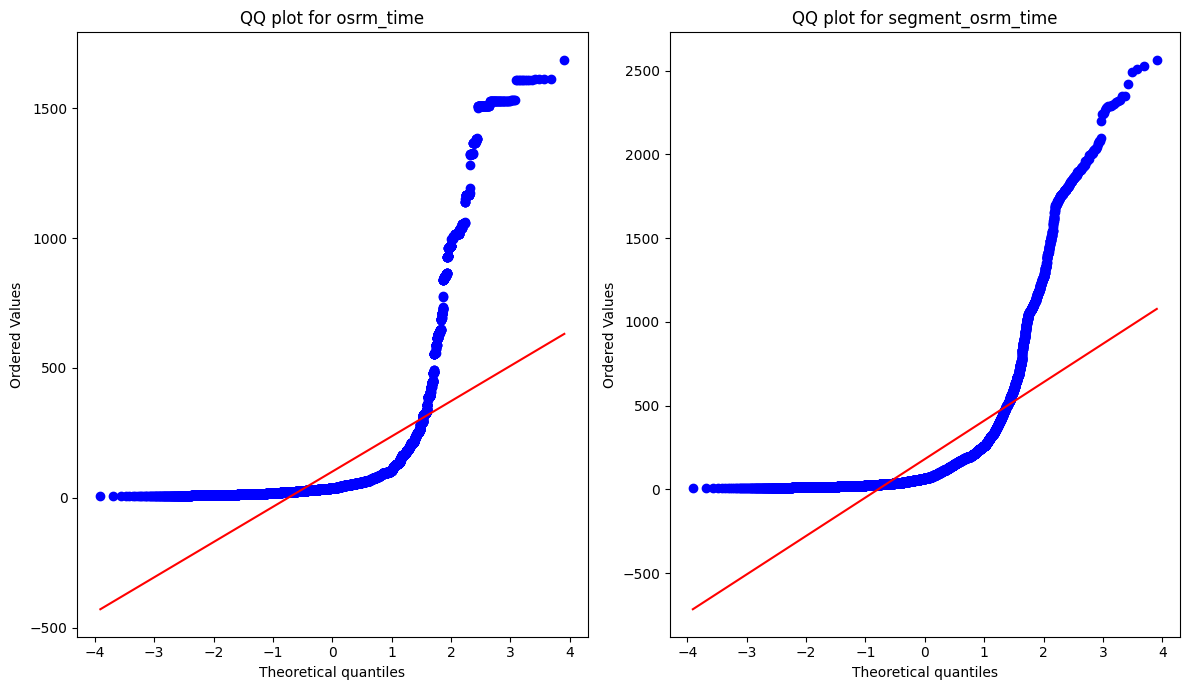

In [ ]:
plt.figure(figsize=(12, 7))

# Plot the QQ plot for 'od_total_time' in the first subplot
plt.subplot(1, 2, 1)
stats.probplot(dfb['osrm_time'], plot=plt)
plt.title('QQ plot for osrm_time')

plt.subplot(1, 2, 2)
stats.probplot(dfb['segment_osrm_time'], plot=plt)
plt.title('QQ plot for segment_osrm_time')


plt.tight_layout()
plt.show()

This does not follow normal distribution.

In [ ]:
test_stat, p_value = levene(dfb['osrm_time'], dfb['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance / Normal distribution')
else:
    print('The samples have Homogenous Variance / Normal distribution ')

p-value 1.983498152793614e-118
The samples do not have Homogenous Variance / Normal distribution


Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis )

In [ ]:
num_col = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination','actual_time','osrm_time',
           'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
dfb[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14787.0,530.313468,658.415416,23.460000,149.695000,279.710000,633.535000,7898.550000
start_scan_to_end_scan,14787.0,339.769730,505.407155,22.000000,104.000000,174.000000,334.000000,7898.000000
actual_distance_to_destination,14787.0,104.005219,242.069053,9.002461,20.086307,32.852495,65.057323,1927.447705
actual_time,14787.0,227.443836,443.875166,9.000000,51.000000,86.000000,182.000000,4532.000000
osrm_time,14787.0,101.437817,213.971631,6.000000,23.000000,38.000000,73.000000,1686.000000
osrm_distance,14787.0,129.210983,293.953554,9.072900,26.018550,41.108100,86.025100,2326.199100
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400


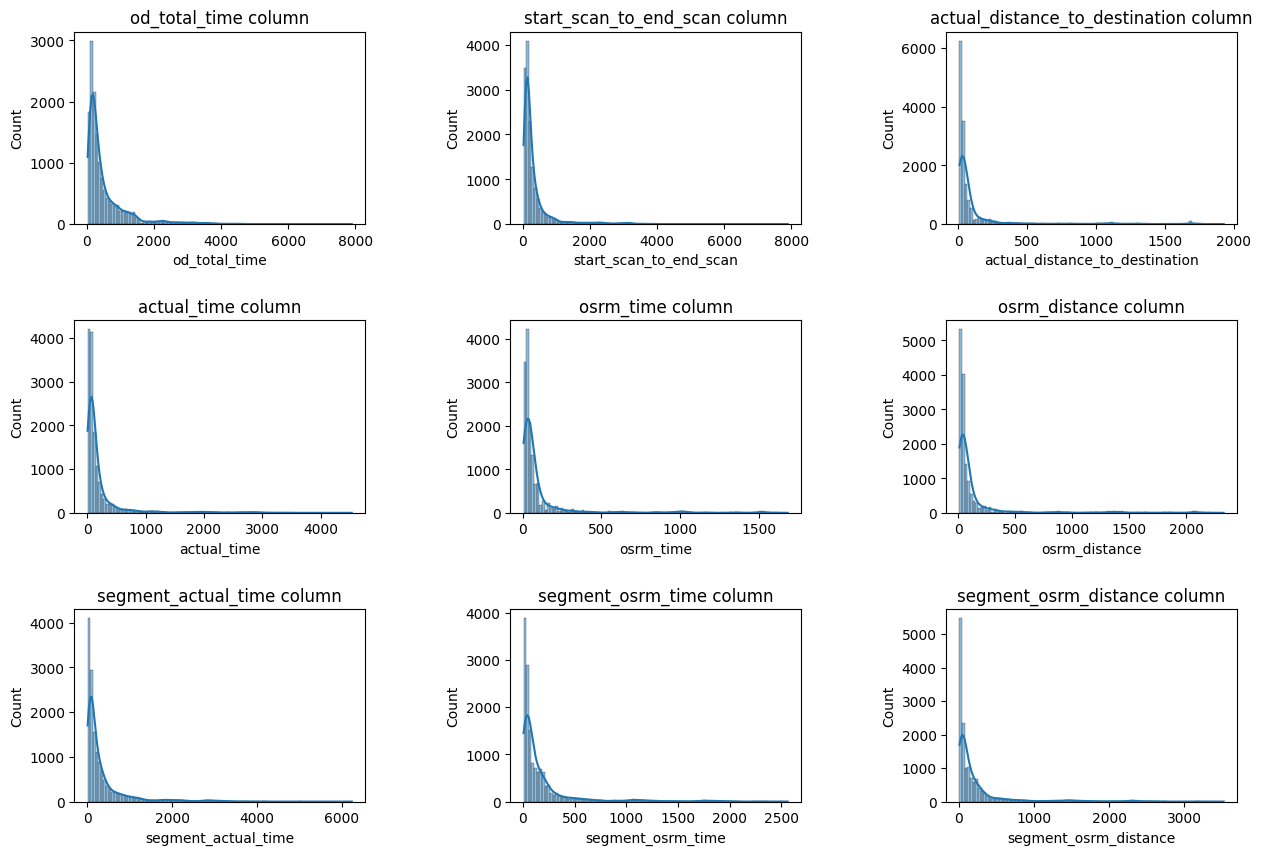

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(len(num_col)):
    plt.subplot(3, 3, i + 1)

    sns.histplot(dfb[num_col[i]], bins = 100, kde = True)

    plt.title(f"{num_col[i]} column")
    plt.plot()




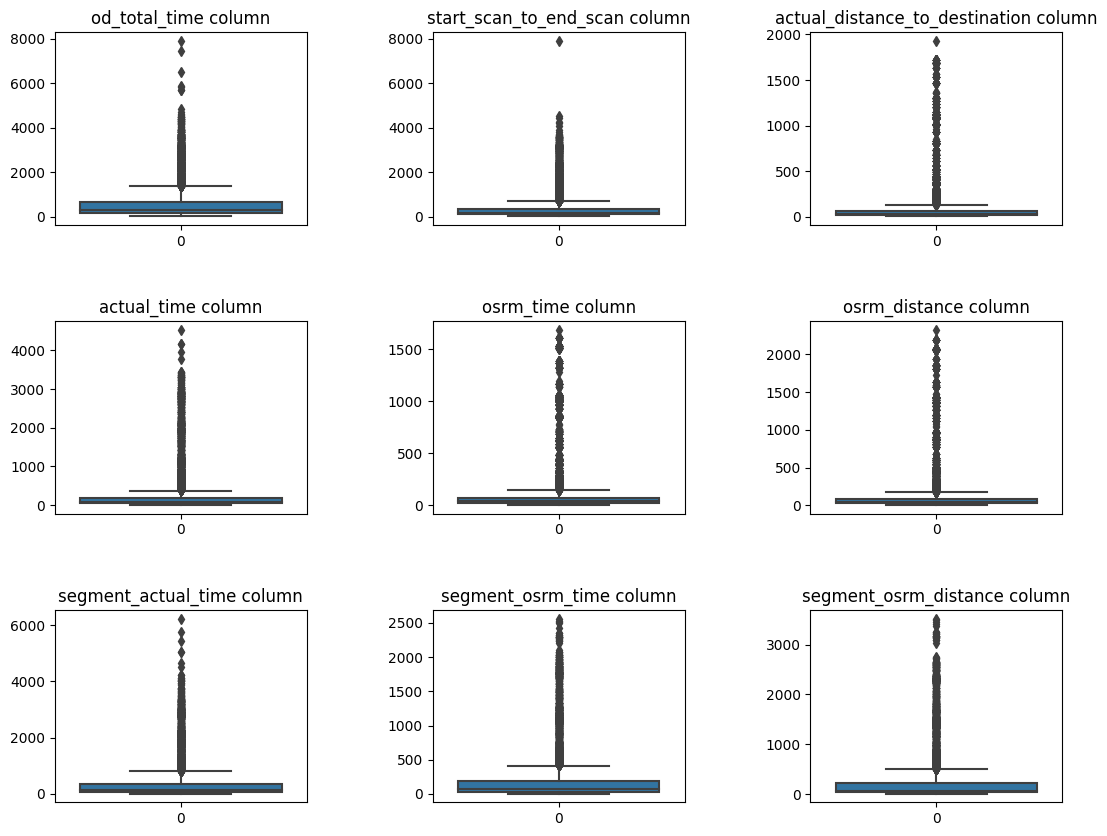

In [ ]:
plt.figure(figsize = (13, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(len(num_col)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(dfb[num_col[i]])
    plt.title(f"{num_col[i]} column")
    plt.plot()



It can be clearly seen that all numerical columns contain outliers.

In [ ]:
# Handle the outliers using the IQR method.

for i in num_col :
    q1 = np.quantile(dfb[i], 0.25)
    q3 = np.quantile(dfb[i], 0.75)
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    outliers = dfb.loc[(dfb[i] < ll) | (dfb[i] > ul)]
    print('Column :', i)
    print(f'Q1 : {q1}')
    print(f'Q3 : {q3}')
    print(f'IQR : {iqr}')
    print(f'LB : {ll}')
    print(f'UB : {ul}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('++++++++++-------++++++++++++')

Column : od_total_time
Q1 : 149.695
Q3 : 633.535
IQR : 483.84
LB : -576.065
UB : 1359.295
Number of outliers : 1275
++++++++++-------++++++++++++
Column : start_scan_to_end_scan
Q1 : 104.0
Q3 : 334.0
IQR : 230.0
LB : -241.0
UB : 679.0
Number of outliers : 1586
++++++++++-------++++++++++++
Column : actual_distance_to_destination
Q1 : 20.086307241358483
Q3 : 65.05732321687972
IQR : 44.97101597552124
LB : -47.37021672192337
UB : 132.51384718016158
Number of outliers : 2127
++++++++++-------++++++++++++
Column : actual_time
Q1 : 51.0
Q3 : 182.0
IQR : 131.0
LB : -145.5
UB : 378.5
Number of outliers : 1858
++++++++++-------++++++++++++
Column : osrm_time
Q1 : 23.0
Q3 : 73.0
IQR : 50.0
LB : -52.0
UB : 148.0
Number of outliers : 1859
++++++++++-------++++++++++++
Column : osrm_distance
Q1 : 26.018549999999998
Q3 : 86.02510000000001
IQR : 60.00655000000001
LB : -63.99127500000002
UB : 176.03492500000004
Number of outliers : 1932
++++++++++-------++++++++++++
Column : segment_actual_time
Q1 : 6

In [ ]:
# Do one-hot encoding of categorical variables (like route_type)

dfa['route_type'].value_counts()

FTL        13798
Carting    12424
Name: route_type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
lab_encod = LabelEncoder()
dfa['route_type'] = lab_encod.fit_transform(dfa['route_type'])

In [ ]:
# Value counts after one-hot encoding.

dfa['route_type'].value_counts()

1    13798
0    12424
Name: route_type, dtype: int64

In [ ]:
dfa['data'].value_counts()

training    18893
test         7329
Name: data, dtype: int64

In [ ]:
lab_en = LabelEncoder()
dfa['data'] = lab_en.fit_transform(dfa['data'])

In [ ]:
# value counts after one-hot encoding.

dfa['data'].value_counts()

1    18893
0     7329
Name: data, dtype: int64

[]

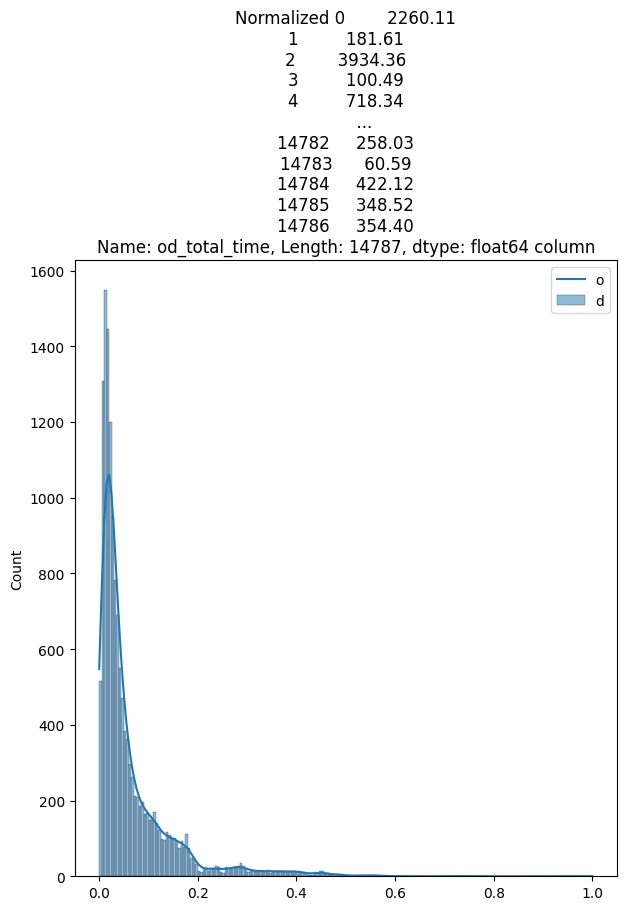

In [ ]:
# Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

plt.figure(figsize = (7, 8))

scal = MinMaxScaler()

scaled = scal.fit_transform(dfb['od_total_time'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Normalized {dfb['od_total_time']} column")
plt.legend('od_total_time')

plt.plot()

[]

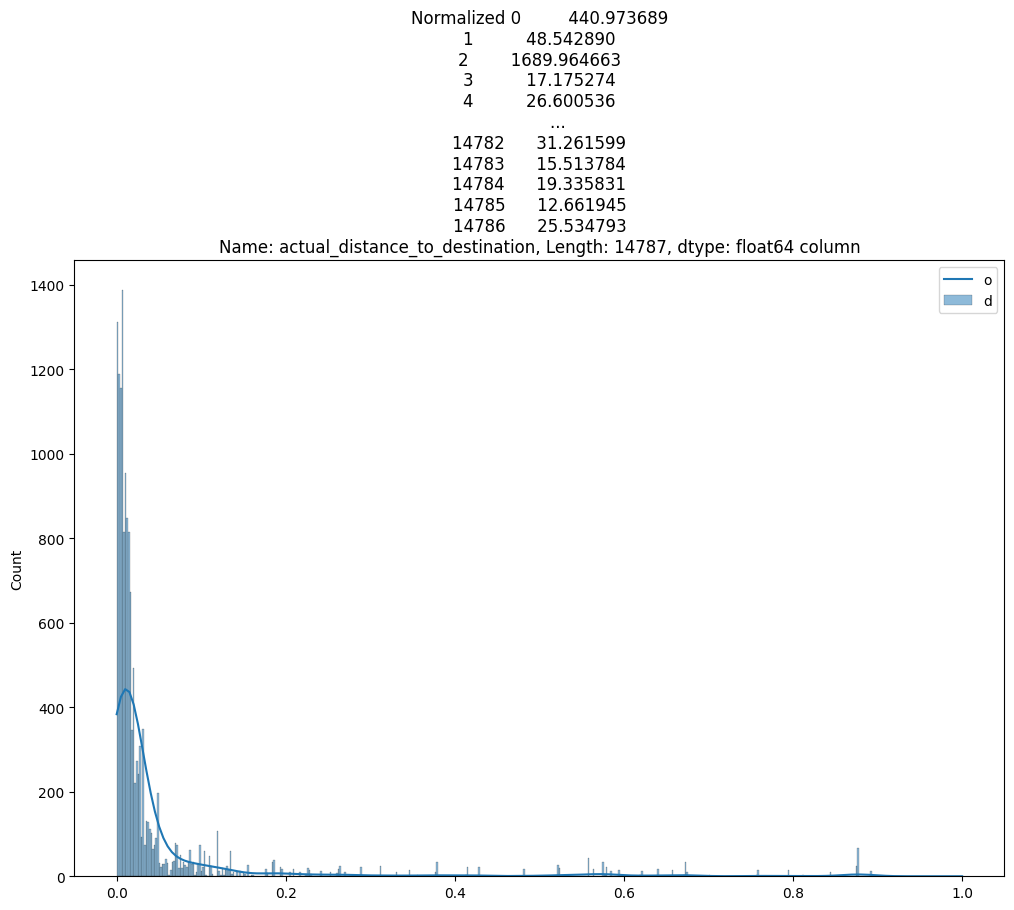

In [ ]:
plt.figure(figsize = (12, 8))

scal = MinMaxScaler()

scaled = scal.fit_transform(dfb['actual_distance_to_destination'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Normalized {dfb['actual_distance_to_destination']} column")
plt.legend('od_total_time')

plt.plot()

[]

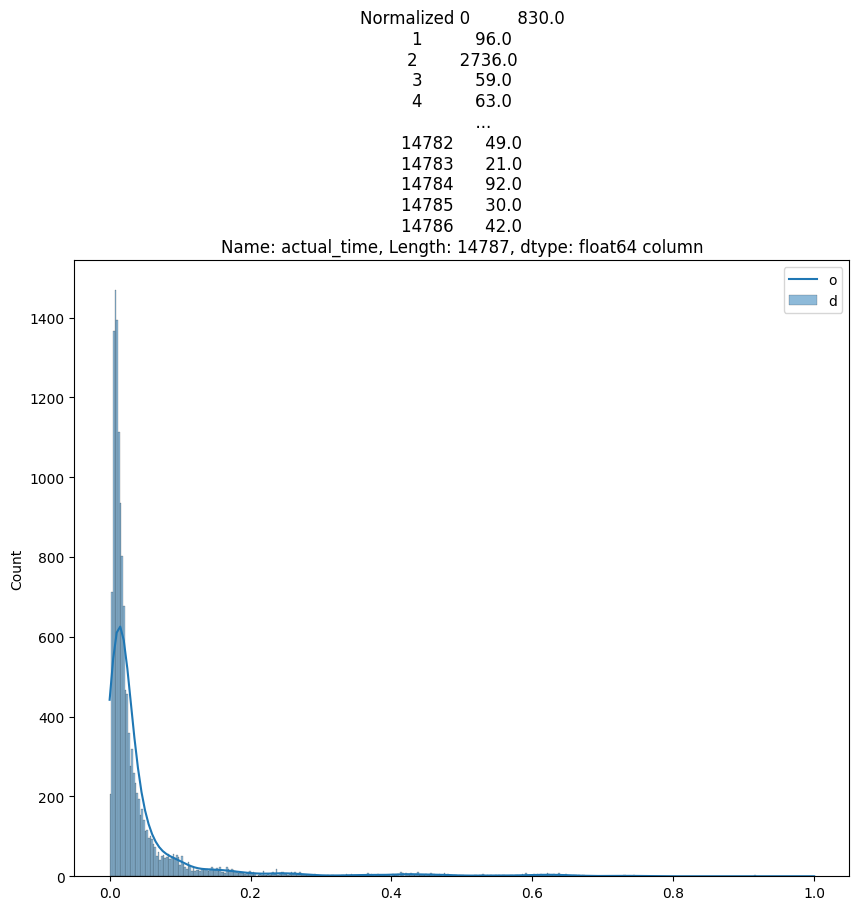

In [ ]:
plt.figure(figsize = (10, 8))

scal = MinMaxScaler()

scaled = scal.fit_transform(dfb['actual_time'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Normalized {dfb['actual_time']} column")
plt.legend('od_total_time')

plt.plot()

[]

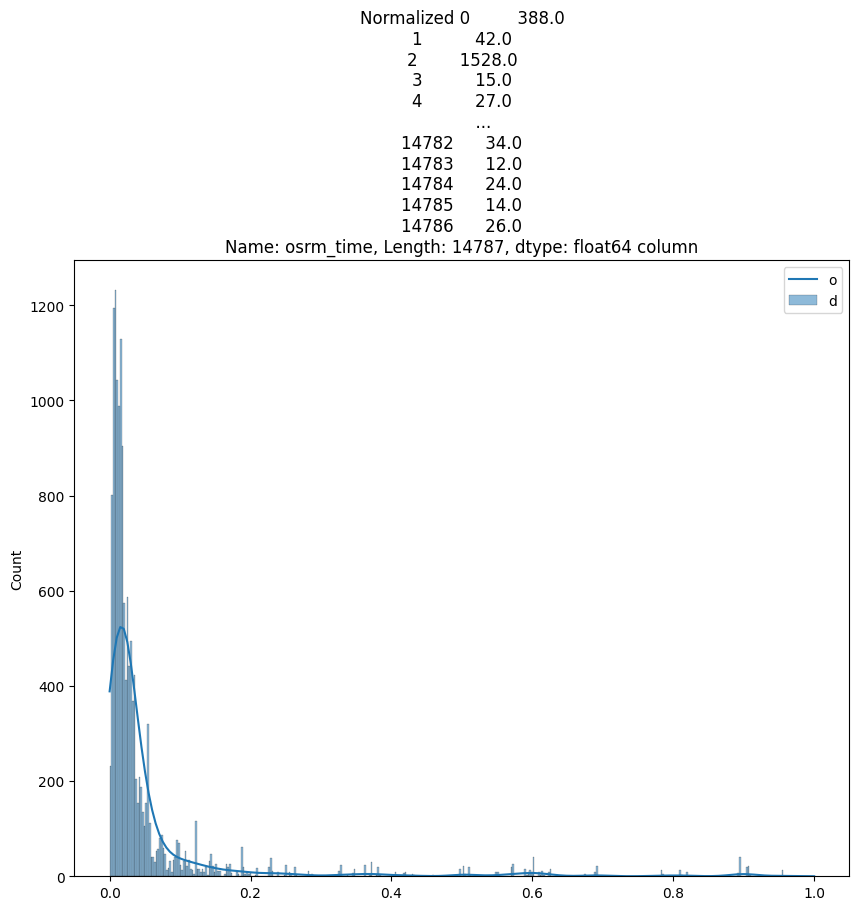

In [ ]:
plt.figure(figsize = (10, 8))

scal = MinMaxScaler()

scaled = scal.fit_transform(dfb['osrm_time'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Normalized {dfb['osrm_time']} column")
plt.legend('od_total_time')

plt.plot()

[]

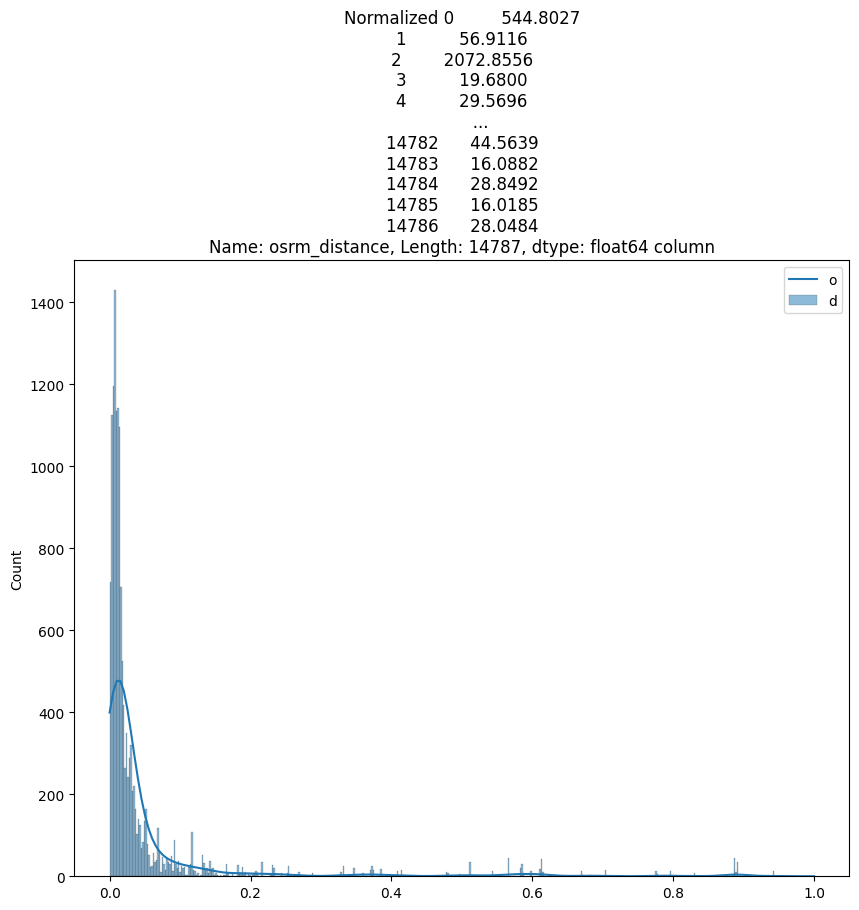

In [ ]:
plt.figure(figsize = (10, 8))

scal = MinMaxScaler()

scaled = scal.fit_transform(dfb['osrm_distance'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Normalized {dfb['osrm_distance']} column")
plt.legend('od_total_time')

plt.plot()

[]

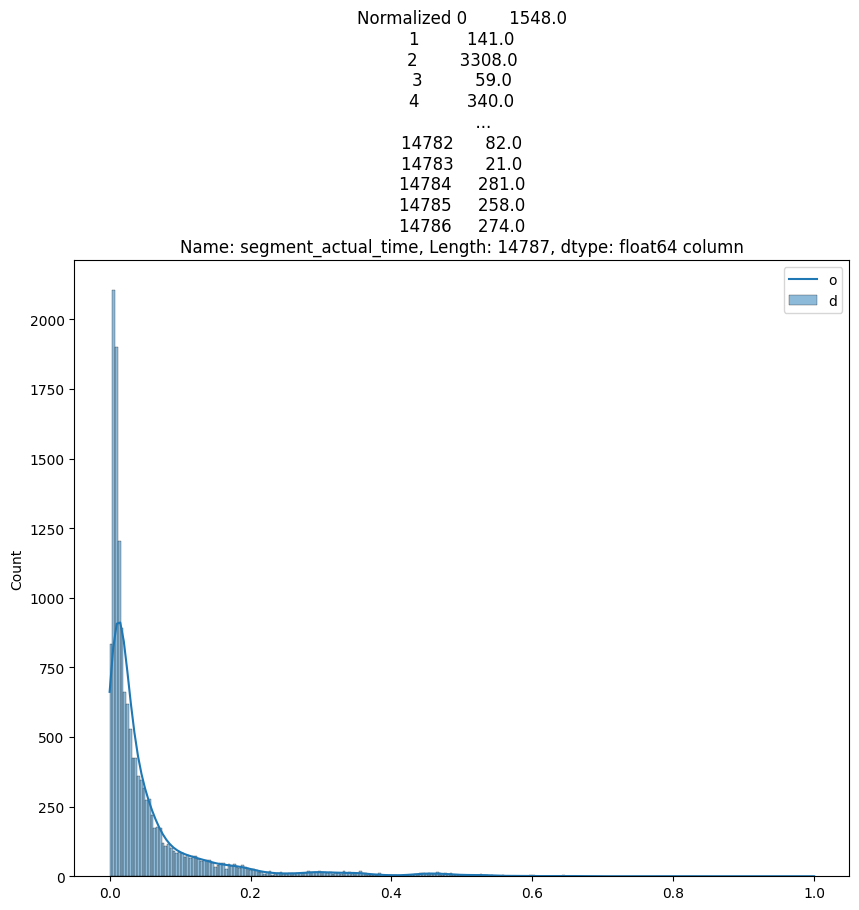

In [ ]:

plt.figure(figsize = (10, 8))

scal = MinMaxScaler()

scaled = scal.fit_transform(dfb['segment_actual_time'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Normalized {dfb['segment_actual_time']} column")
plt.legend('od_total_time')

plt.plot()

[]

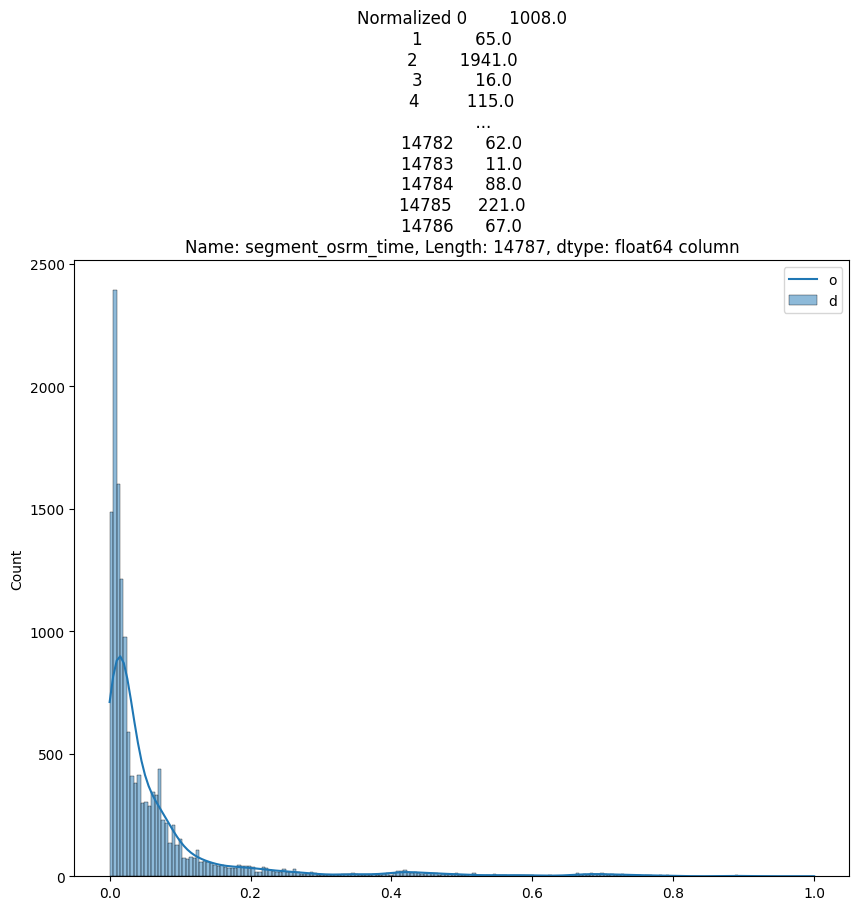

In [ ]:

plt.figure(figsize = (10, 8))

scal = MinMaxScaler()

scaled = scal.fit_transform(dfb['segment_osrm_time'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Normalized {dfb['segment_osrm_time']} column")
plt.legend('od_total_time')

plt.plot()

[]

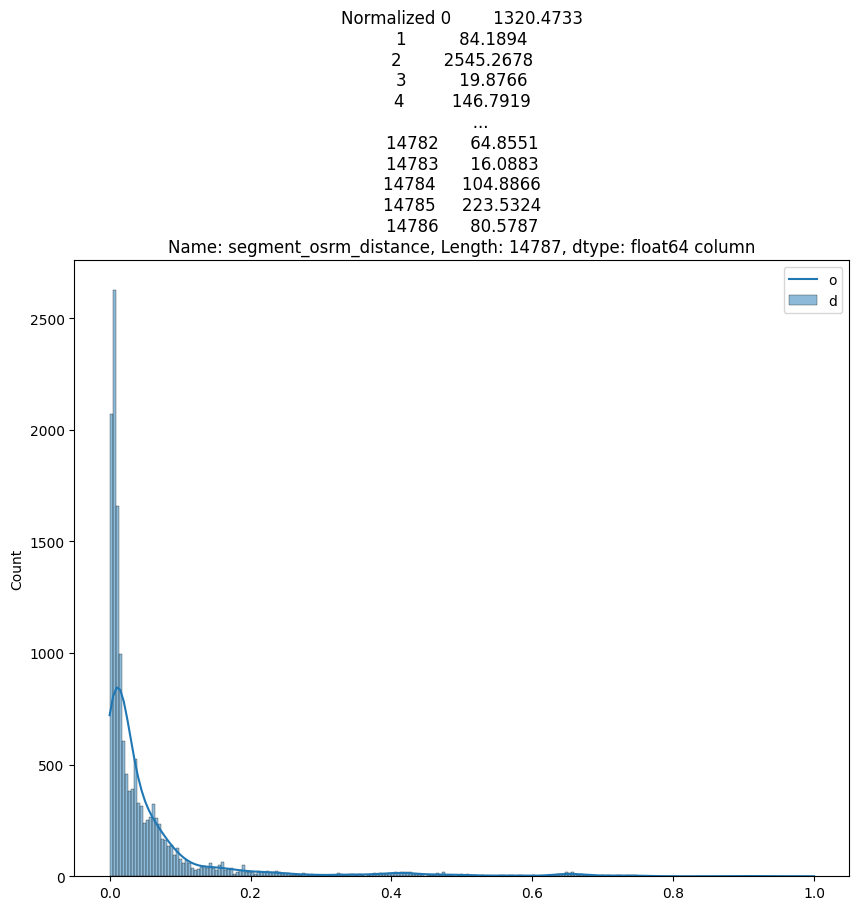

In [ ]:
plt.figure(figsize = (10, 8))

scal = MinMaxScaler()

scaled = scal.fit_transform(dfb['segment_osrm_distance'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Normalized {dfb['segment_osrm_distance']} column")
plt.legend('od_total_time')

plt.plot()

[]

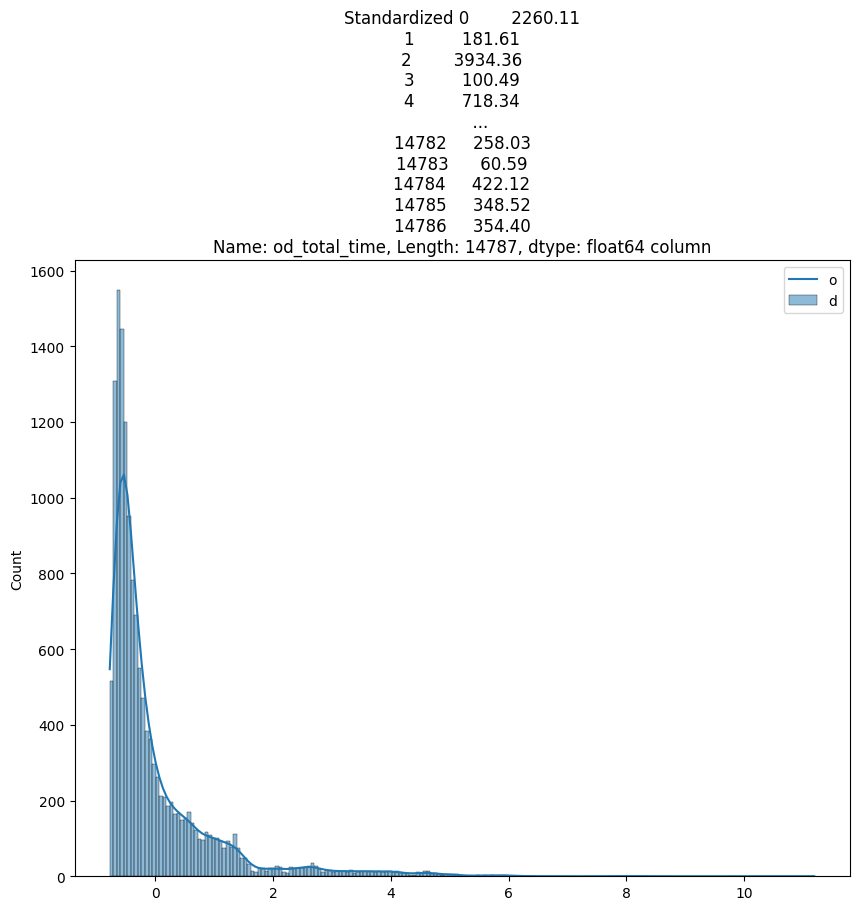

In [ ]:
# Standardize

plt.figure(figsize = (10, 8))

scal = StandardScaler()

scaled = scal.fit_transform(dfb['od_total_time'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Standardized {dfb['od_total_time']} column")
plt.legend('od_total_time')

plt.plot()

[]

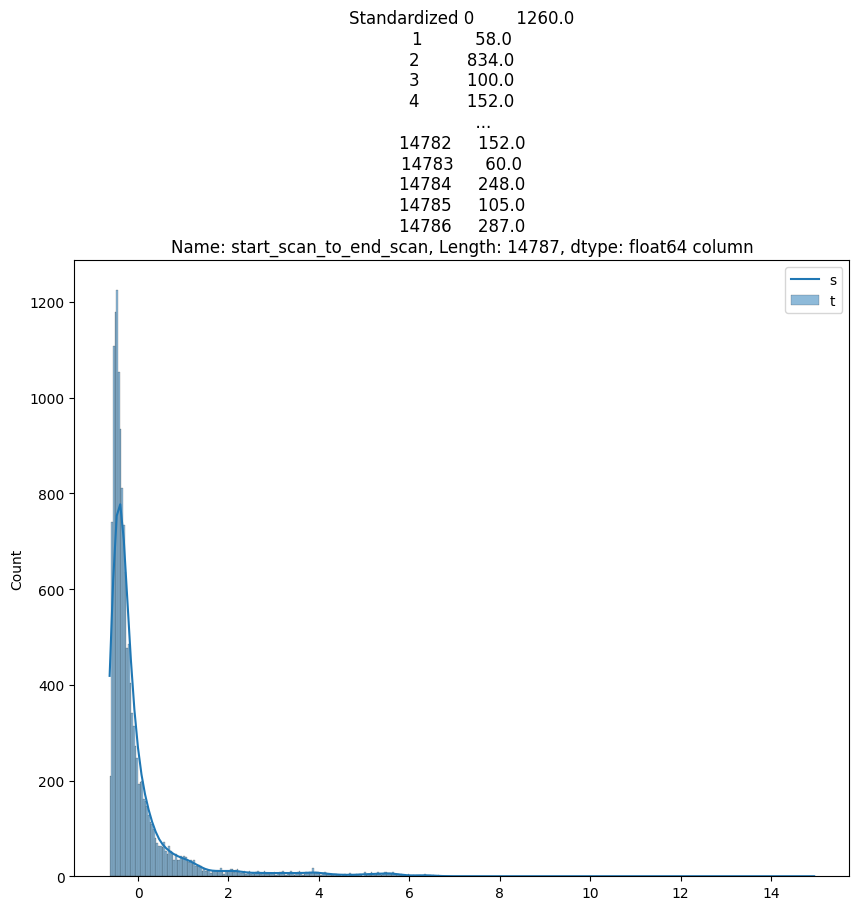

In [ ]:
plt.figure(figsize = (10, 8))

scal = StandardScaler()

scaled = scal.fit_transform(dfb['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Standardized {dfb['start_scan_to_end_scan']} column")
plt.legend('start_scan_to_end_scan')

plt.plot()

[]

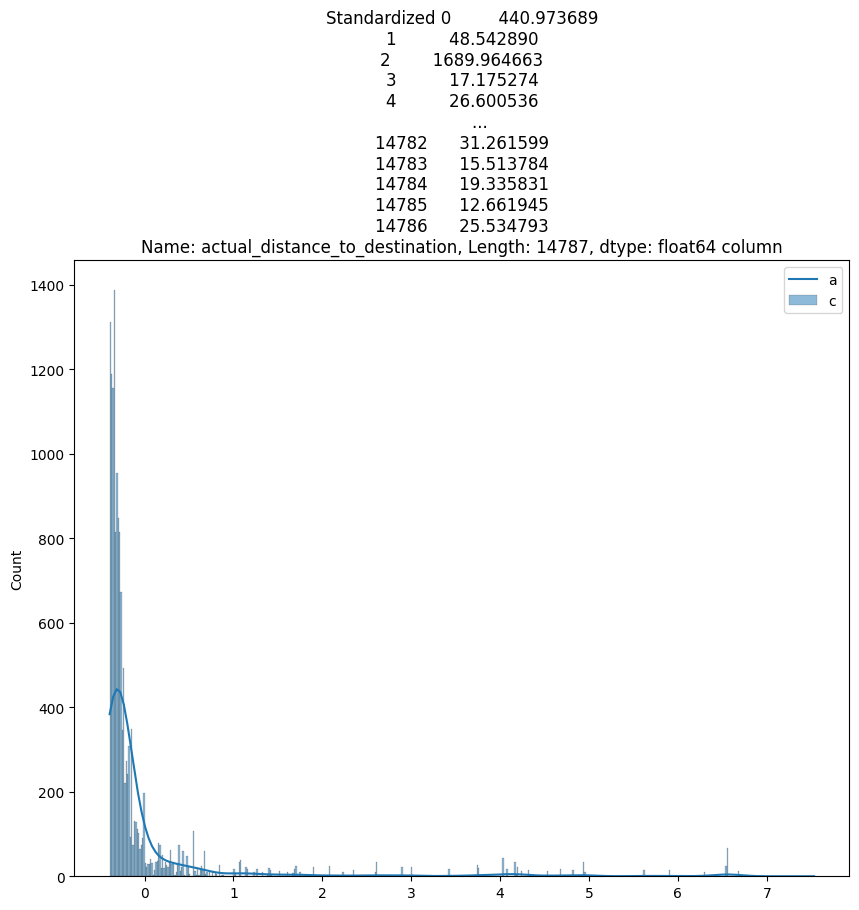

In [ ]:
plt.figure(figsize = (10, 8))

scal = StandardScaler()

scaled = scal.fit_transform(dfb['actual_distance_to_destination'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Standardized {dfb['actual_distance_to_destination']} column")
plt.legend('actual_distance_to_destination')

plt.plot()

[]

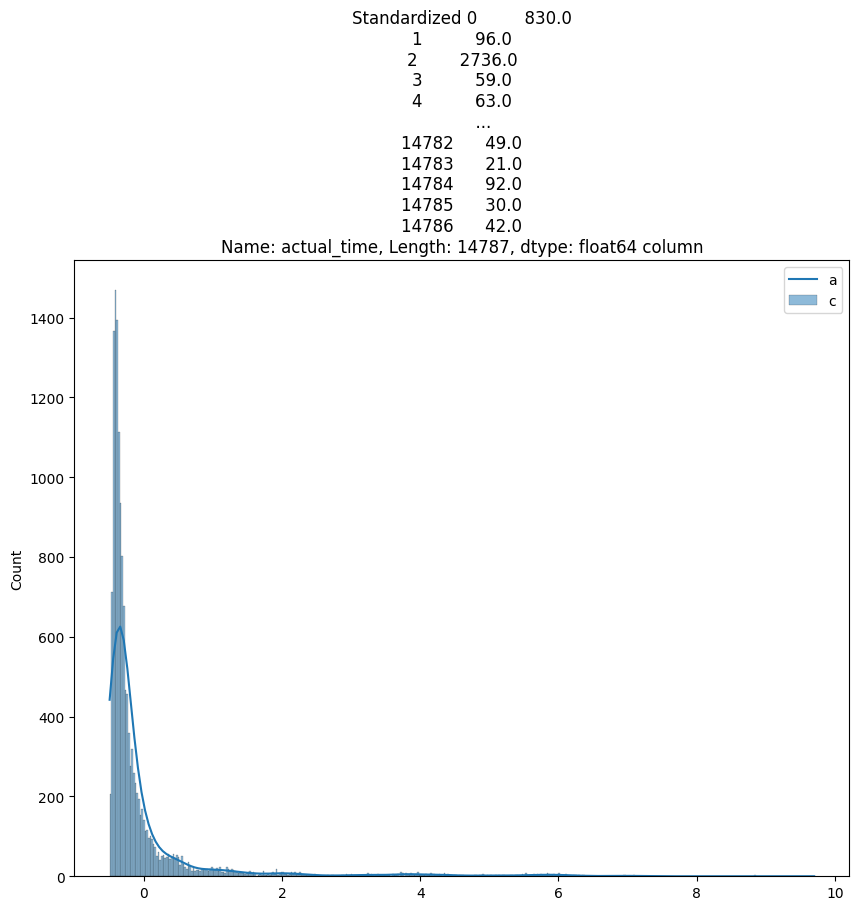

In [ ]:
plt.figure(figsize = (10, 8))

scal = StandardScaler()

scaled = scal.fit_transform(dfb['actual_time'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Standardized {dfb['actual_time']} column")
plt.legend('actual_time')

plt.plot()

[]

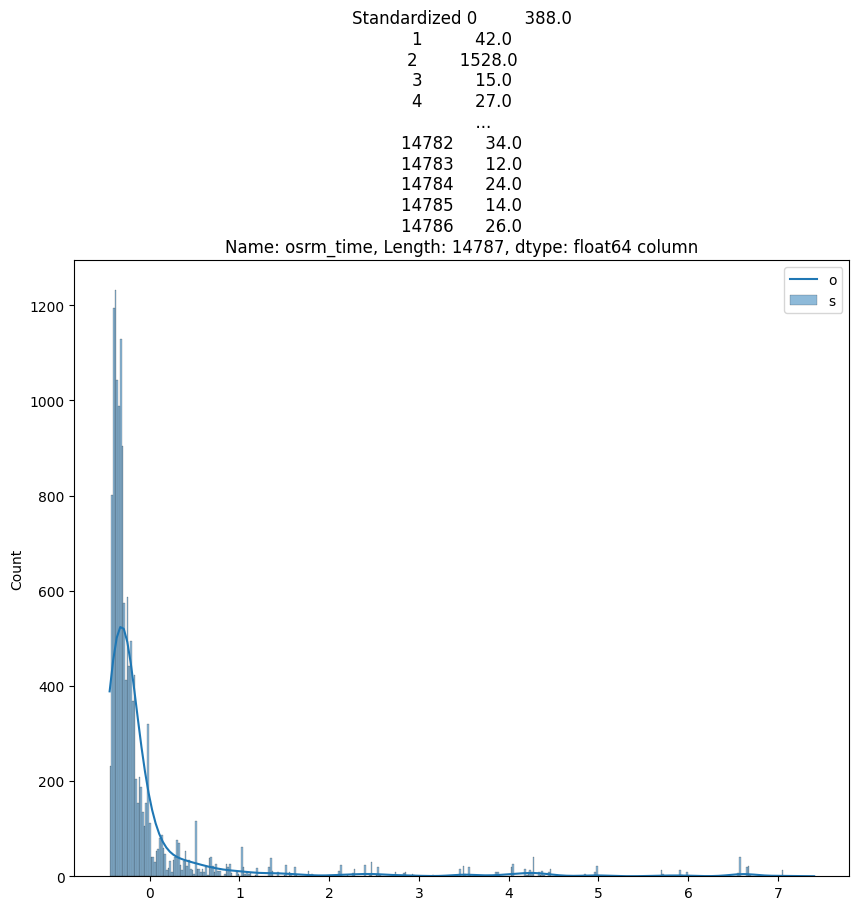

In [ ]:
plt.figure(figsize = (10, 8))

scal = StandardScaler()

scaled = scal.fit_transform(dfb['osrm_time'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Standardized {dfb['osrm_time']} column")
plt.legend('osrm_time')

plt.plot()

[]

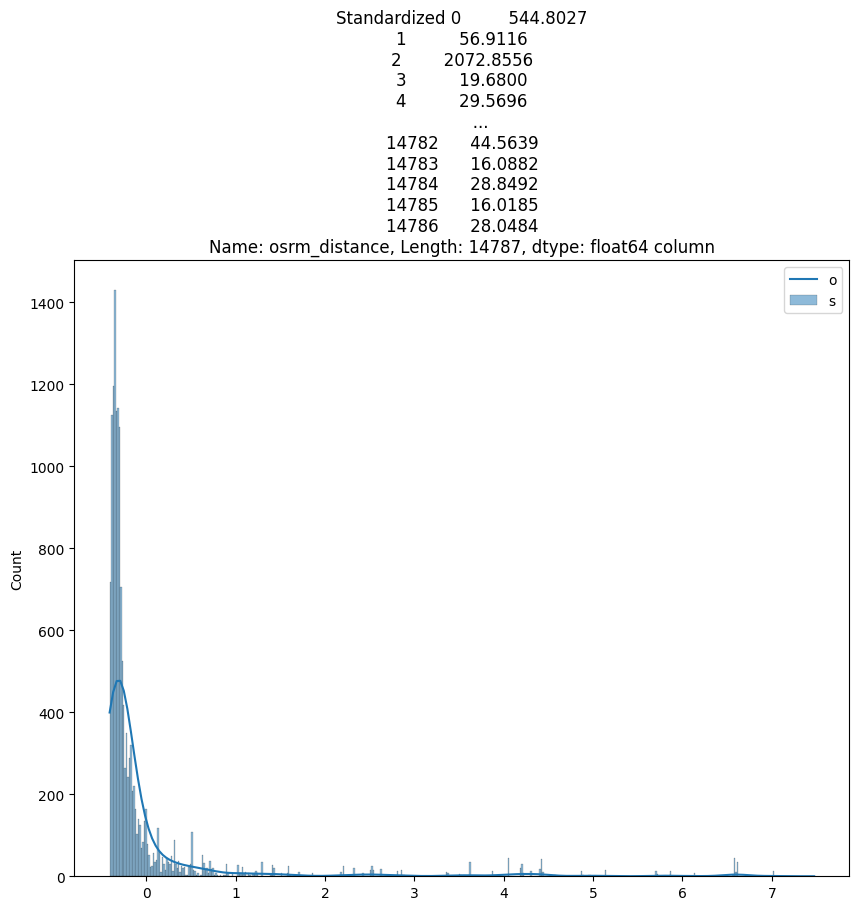

In [ ]:
plt.figure(figsize = (10, 8))

scal = StandardScaler()

scaled = scal.fit_transform(dfb['osrm_distance'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Standardized {dfb['osrm_distance']} column")
plt.legend('osrm_distance')

plt.plot()

[]

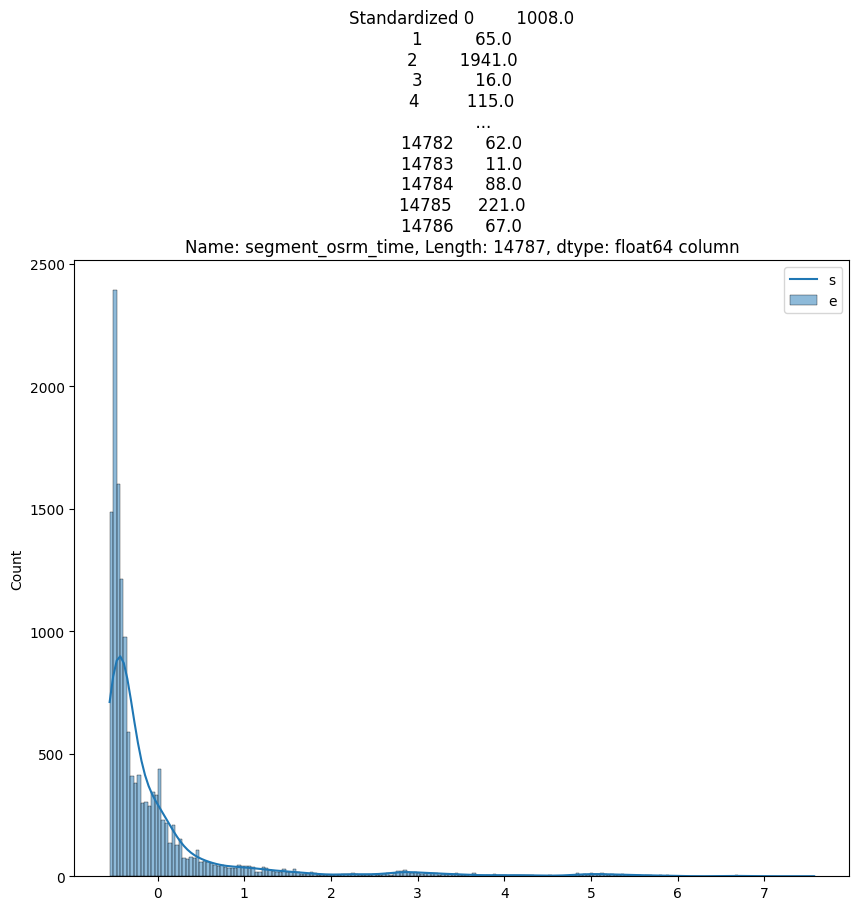

In [ ]:
plt.figure(figsize = (10, 8))

scal = StandardScaler()

scaled = scal.fit_transform(dfb['segment_osrm_time'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Standardized {dfb['segment_osrm_time']} column")
plt.legend('segment_osrm_time')

plt.plot()

[]

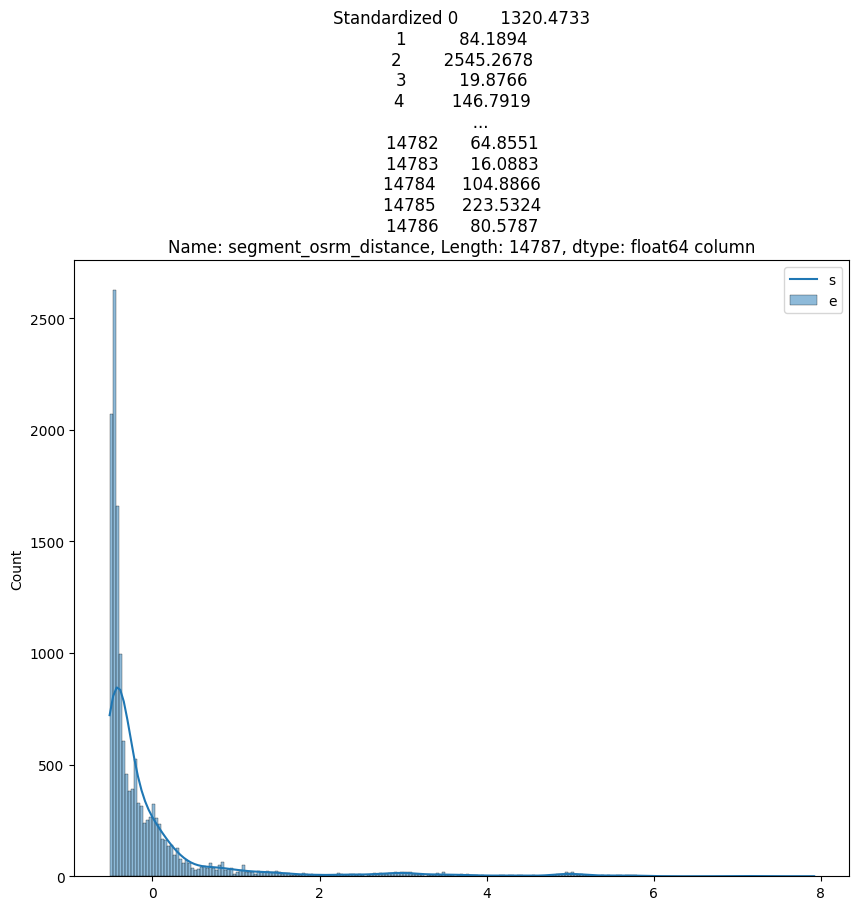

In [ ]:
plt.figure(figsize = (10, 8))

scal = StandardScaler()

scaled = scal.fit_transform(dfb['segment_osrm_distance'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Standardized {dfb['segment_osrm_distance']} column")
plt.legend('segment_osrm_distance')

plt.plot()

[]

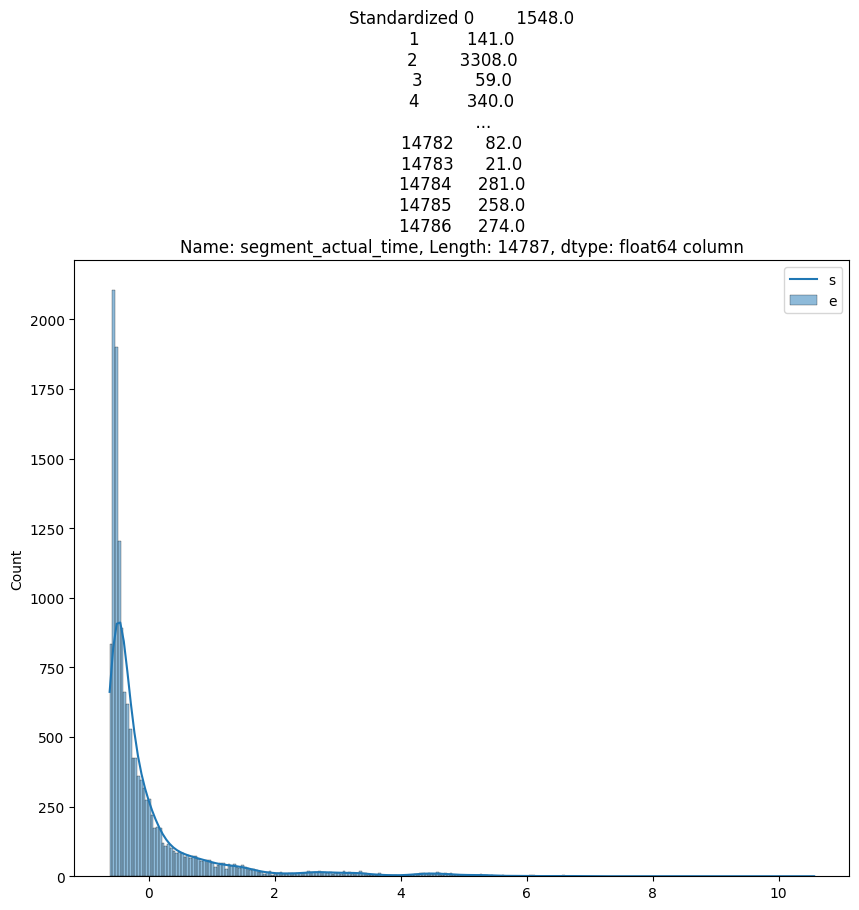

In [ ]:
plt.figure(figsize = (10, 8))

scal = StandardScaler()

scaled = scal.fit_transform(dfb['segment_actual_time'].to_numpy().reshape(-1, 1))

sns.histplot(scaled,color='r',kde="true")
plt.title(f"Standardized {dfb['segment_actual_time']} column")
plt.legend('segment_actual_time')

plt.plot()

Insights :



The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.

There are about 687 unique source cities, 806 unique destination cities.

Most number of trips started from Mumbai followed by Gurgaon, Delhi, Bengaluru and Bhiwandi. Thus, the seller base is strong in these cities.

Most number of trips ended in Maharashtra followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. Thus, the number of orders placed in these states is significantly high.

Most number of trips ended in Mumbai followed by Bengaluru, Gurgaon, Delhi and Chennai. Thus, the number of orders placed in these cities is significantly high.

Most orders in terms of destination are coming from cities like Mumbai, Gurgaon, Bengaluru, Delhi.

Most of the data is for testing than for training.

Most common route type is Carting.

The number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

Maximum trips are created in the 38th week.

Most orders come mid-month. That means customers usually make more orders in the mid of the month.

Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana

Most orders in terms of destination are coming from cities like bengaluru, mumbai, gurgaon, bangalore, Delhi.


Features actual_time & osrm_time are statitically different.

Features osrm_distance and segment_osrm_distance are statistically different from each other.




Recommendations:

Team need to look into difference in actual distance and osrm distance to cut off miscelleneous cost.

Orders from Maharashtra , Karnataka, Haryana, Tamil Nadu and Uttar Pradesh are significantly high so more network can be expanded.

Most orders are shipped from Mumbai ,Gurgaon Delhi, Bengaluru and Bhiwandi so these cities can be considered as hub and big shipphing centre and be made.

There is difference between osrm_time and actual_time. Team needs to make sure this is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect order on time.

The trip system needs imporvements like, optimizing the time difference and distance.

